FH2


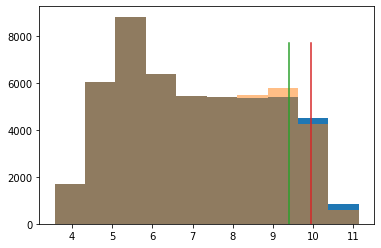

FP: 0.42398 FN: 0.57602
FP: 0.34656 FN: 0.65344
FCH4


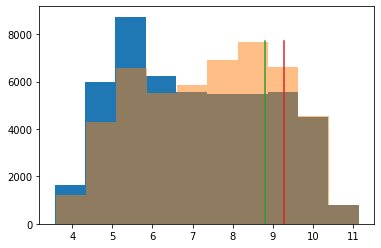

FP: 0.51718 FN: 0.38056
FP: 0.44848 FN: 0.45418
R1


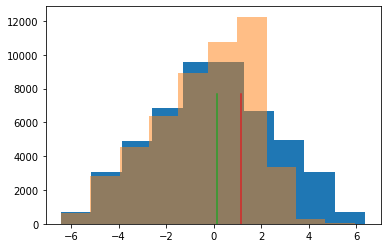

FP: 0.75794 FN: 0.24206
FP: 0.6308 FN: 0.36944


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
timec = 60*60*24*365

outcomes = pd.read_csv('enceladus_data/core_batch_000raw.csv',
                       delimiter=';',index_col=0)


observables_abiotic = pd.DataFrame(data={'FH2':outcomes['H2_ab']*timec,
                                         'FCH4':outcomes['CH4_ab']*timec,
                                         'R1':outcomes['H2_ab']/outcomes['CH4_ab']})

observables_biotic = pd.DataFrame(data={'FH2':outcomes['H2']*timec,
                                        'FCH4':outcomes['CH4']*timec,
                                        'R1':outcomes['H2']/outcomes['CH4']})

logobservations = pd.read_csv('enceladus_data/logobservations.csv',
                              delimiter=';',index_col=0)

for c in observables_abiotic.columns:
    print(c)
    plt.hist(np.log10(observables_abiotic[c]),
             #bins=np.arange(3,12,.1)
            )
    plt.hist(np.log10(observables_biotic[c]),
             #bins=np.arange(3,12,.1),
             alpha=.5)

    lobab = np.log10(observables_abiotic[c])
    lobb = np.log10(observables_biotic[c])
    logo0 = logobservations[c].iloc[0]
    logo1 = logobservations[c].iloc[1]
    plt.plot([logo0,logo0],[0,7700])
    plt.plot([logo1,logo1],[0,7700])
    plt.show()
    d = 2
    print('FP:',(lobab>(logo0-d)).mean(),
     'FN:',(lobb<(logo0-d)).mean())
    print('FP:',(lobab>(logo1-d)).mean(),
     'FN:',(lobb<(logo1-d)).mean())

In [37]:
[(lobab>logo0-d).mean(),
 (lobab>logo1-d).mean()],\
[(lobb<(logo0-d)).mean(),
(lobb<(logo1-d)).mean()]

([0.75794, 0.6308], [0.24206, 0.36944])